notebook by Leo van Kampenhout (L.vankampenhout@uu.nl)

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
import numpy as np

%matplotlib inline


# Basic anatomy  
![bla](fig_map.png)

This illustration is not quite accurate, as the Axes does _not_ include the annotation (ticks, titles, etc.) around it. 

This is better:

![bla](axes2.png)

Note that the Axes is always equal or smaller than the Figure (preferably smaller). 

# Figure canvas & white space

By default, `%matplotlib inline` will cut all white space around Axes before displaying it in the notebook. As a result, a plot you'll see in the notebook is typically slightly different than the PNG (or PDF) figure obtained through `fig.savefig()`. You may have noticed this yourself.

The exact configuration option responsible for this behaviour is 
<br>
`%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}`

We can change this behaviour temporarily by setting 
<br>
`%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}`



In [3]:
def enable_cut_whitespace_inline():
    %config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}
    
def disable_cut_whitespace_inline():
    %config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

Compare this figure (default behaviour)

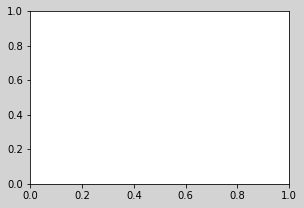

In [7]:
enable_cut_whitespace_inline()
fig = plt.figure(facecolor='lightgrey')
ax = fig.add_axes((0.2, 0.2, 0.6, 0.6))
fig.savefig('example.png')

to this figure (custom behaviour) and you'll tell the difference:

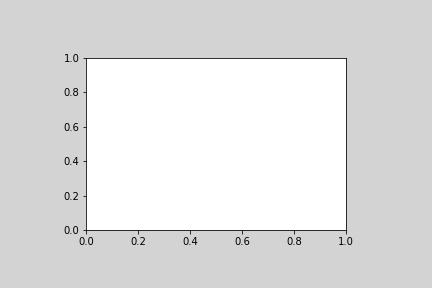

In [10]:
disable_cut_whitespace_inline()
fig = plt.figure(facecolor='lightgrey')
ax = fig.add_axes((0.2, 0.2, 0.6, 0.6))

The second figure resembles what is stored in `example.png`, and includes the white space. For the remainder of the notebook we will maintain the 2nd behaviour (no cutting of whitespace) in order to demonstrate some concepts.

## Drawing outside of figure canvas

A potential pitfall in Matplotlib is that the user generates objects that "fall off" the figure / canvas, i.e. they extend beyond the figure domain.  Two examples are given.

### Example 1: Axes with default extent

Whenever an Axes object is implicitly created, as in this example, it will assume a default size. For most plots, this size is adequate, but not always. For instance we could have very large text labels that exceed the available canvas:

Text(0, 0.5, 'Amplitude')

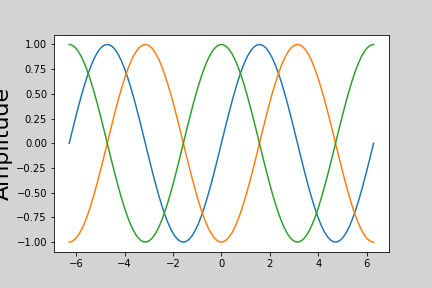

In [12]:
fig = plt.figure(facecolor='lightgrey')
x = np.linspace(-2*np.pi, 2*np.pi, 100)
plt.plot(x,np.sin(x),label='sin(x)')
plt.plot(x,np.sin(x-np.pi/2),label='sin(x - $\pi$/2)')
plt.plot(x,np.cos(x),label='cos(x)')

plt.ylabel('Amplitude', fontsize=22)

Here are 2 solutions to this problem:
* call `plt.tight_layout()` [(doc)](https://matplotlib.org/users/tight_layout_guide.html) afterwards to automatically adjust the size and spacing of all Axes. This option is more automatic, and is useful in other cases too, like two overlapping Axes.  
* call `plt.subplots_adjust(left=0.2)` [(doc)](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html) to adjust the leftmost border of the leftmost Axes. This option offers more control. This call can be made both before and after the `plot()` call. 

Now, try both of these solutions in the cell below.

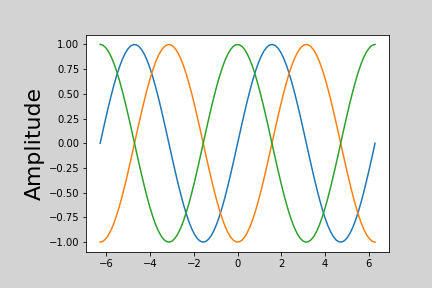

In [13]:
fig = plt.figure(facecolor='lightgrey')

x = np.linspace(-2*np.pi, 2*np.pi, 100)
plt.plot(x,np.sin(x),label='sin(x)')
plt.plot(x,np.sin(x-np.pi/2),label='sin(x - $\pi$/2)')
plt.plot(x,np.cos(x),label='cos(x)')

plt.ylabel('Amplitude', fontsize=22)
#plt.tight_layout()
plt.subplots_adjust(left=0.2)

### Example 2: Axes with custom extent

Axes with custom extent give great control over the plot so these are often encountered in example online. A custom-sized Axes is created as follows using the OO-interface

```python
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes((.1,.1,.8,.8))
```
where (.1,.1) are the coordinates of the bottom-left corner of the Axes and (.8, .8) the dimensions (width, height) on a 1-by-1 canvas. An Axes object created this way will not "listen" to `plt.tight_layout()` and `plt.subplots_adjust()` anymore. In fact it may give an error message if you try to call those. In other words, custom Axes extents are to be used with care.



In the next example, we set the extent of the Axes equal to the extent of the Figure: (0,0) to (1,1). Observe that all annotations (ticks, titles, etc.) are cut off because they are placed outside the figure canvas.

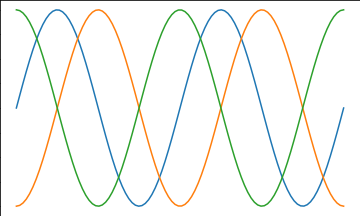

In [14]:
fig = plt.figure(figsize=(5,3), facecolor='lightgrey')

# ax = fig.add_axes((0.1,0.1,.8,.8)) ## GOOD
ax = fig.add_axes((0,0,1,1)) ## BAD
ax.set_title('Some trigonometric functions')

x = np.linspace(-2*np.pi, 2*np.pi, 100)
plt.plot(x,np.sin(x),label='sin(x)')
plt.plot(x,np.sin(x-np.pi/2),label='sin(x - $\pi$/2)')
plt.plot(x,np.cos(x),label='cos(x)')

# Coordinate systems

It is good to understand the distinction between these [three types of coordinates in Matplotlib](https://matplotlib.org/users/transforms_tutorial.html):

* Figure coordinates, which are bounded by [0,1]. 
* Axes coordinates, which are bounded by [0,1]. 
* Data coordinates, which are arbitrary.

There is a fourth coordinate type (i.e. the _display_ coordinate) but personally I haven't ever encountered this one, so I will skip that.  

## Figure coordinates

Figure coordinates describe space relative to the figure. (0,0) is bottom left of the figure, and (1,1) is top right of the figure.

As we saw above, whenever an Axes is implicit generated, Matplotlib will come up with some default extent. This extent can be retrieved via `ax.get_position()`.

Bbox([[0.125, 0.125], [0.9, 0.88]])

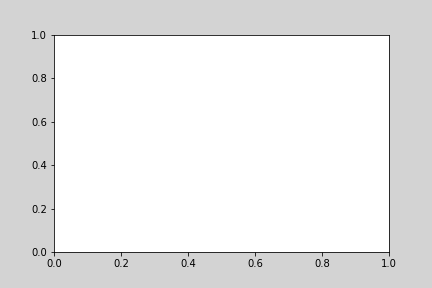

In [18]:
fig,ax = plt.subplots(1, facecolor='lightgrey')
pos = ax.get_position()
pos

Here, `Bbox` is shorthand for Bounding Box. The 4 values are the coordinates of corners of the box (`x0`,`x1`,`y0`,`y1`), specified in _figure coordinates_ so  ranging [0-1]. Further, a bounding box has  a `width` and `height` that can be queried.

In [11]:
pos.y1, pos.width, pos.height

(0.88, 0.775, 0.755)

Drawing using figure coordinates can be done using the `transform=transFigure` argument to many Matplotlib statements. For example:

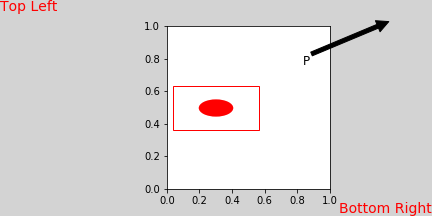

In [24]:
fig,ax = plt.subplots(1, figsize=(6,3), facecolor='lightgrey')
fig.subplots_adjust(left=0.25)
ax.set_aspect('equal')

ax.text(x=0.0, y=1, 
        s='Top Left', color='r', 
        transform=fig.transFigure, # Figure coordinates
        fontsize=14,
        verticalalignment='top') 

ax.text(x=1, y=0.0, 
        s='Bottom Right', color='r', 
        transform=fig.transFigure, # Figure coordinates
        fontsize=14, 
        horizontalalignment='right', 
        verticalalignment='bottom') 

# Create some shapes
rect = patches.Rectangle((0.4,0.4),0.2,0.2,linewidth=1,edgecolor='r',facecolor='none', transform=fig.transFigure)
circ = patches.Circle((0.5,0.5),radius=0.04,facecolor='r',transform=fig.transFigure)

for shape in rect,circ: 
    ax.add_patch(shape)

# Axes.annotate does not have the "transform" argument since it offers the flexibility
# to the transform the target point and the text location separately. The tranformation can 
# be specified using the "xycoords" and "textcoords" arguments
ax.annotate(s='P', 
            xy=(.9,.9), 
            xytext=(.7,.7), 
            xycoords=fig.transFigure,
            textcoords=fig.transFigure,
            fontsize=12,
            arrowprops=dict(facecolor='black'));

Note that both the circle and the rectangle are centered in the _figure_, but not centered within the _axes_. Moreover, note that the circle is not really circular because the figure itself has a non-equal aspect ratio (5:2). The fact that the axes is square does not matter.




## Axes coordinates
Axes coordinates describe space relative to the Axes. (0,0) is bottom left of the axes, and (1,1) is top right of the axes.

The correponding transformation is `ax.transAxes`

We now modify the example above and specify all coordinates in Axes coordinates. The rectangle will now be centred inside the Axes, and the circle will really circular since the Axes is square (i.e. the aspect ratio is set to 'equal'). 

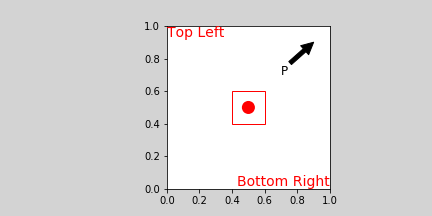

In [25]:
fig,ax = plt.subplots(1, figsize=(6,3), facecolor='lightgrey')
fig.subplots_adjust(left=0.25)
ax.set_aspect('equal')

ax.text(x=0.0, y=1, 
        s='Top Left', color='r', 
        transform=ax.transAxes, # axes coordinates
        fontsize=14,
        verticalalignment='top') 

ax.text(x=1, y=0, 
        s='Bottom Right', color='r', 
        transform=ax.transAxes, # axes coordinates
        fontsize=14, 
        horizontalalignment='right',
        verticalalignment='bottom') 

# Create some shapes
rect = patches.Rectangle((0.4,0.4),0.2,0.2,linewidth=1,edgecolor='r',facecolor='none', transform=ax.transAxes)
circ = patches.Circle((0.5,0.5),radius=0.04,facecolor='r',transform=ax.transAxes)

for shape in rect,circ: 
    ax.add_patch(shape)

# Axes.annotate does not have the "transform" argument since it offers the flexibility
# to the transform the target point and the text location separately. The tranformation can 
# be specified using the "xycoords" and "textcoords" arguments
ax.annotate(s='P', 
            xy=(.9,.9), 
            xytext=(.7,.7), 
            xycoords=ax.transAxes,
            textcoords=ax.transAxes,
            fontsize=12,
            arrowprops=dict(facecolor='black'));

Note that Axes coordinates do not require that objects must be located _within_ the Axes. Using e.g. negative coordinates one may still draw outside the Axes.

Here is an example where it is useful to use Axes coordinates but draw outside of the actual Axes itself (but within the Figure extent of course).

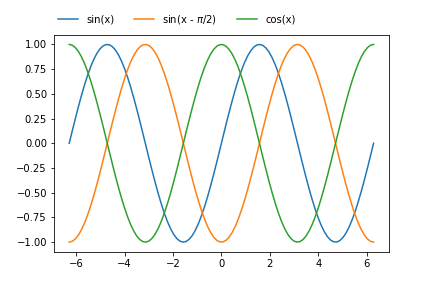

In [22]:
"""
EXAMPLE MODIFIED FROM: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
"""

fig,ax = plt.subplots(1)

x = np.linspace(-2*np.pi, 2*np.pi, 100)
plt.plot(x,np.sin(x),label='sin(x)')
plt.plot(x,np.sin(x-np.pi/2),label='sin(x - $\pi$/2)')
plt.plot(x,np.cos(x),label='cos(x)')

# Bbox coordinates are interpreted in the coordinate system given by
# `bbox_transform`, with the default transform
# Axes or Figure coordinates, depending on which ``legend`` is called.  
plt.legend(bbox_to_anchor=(0,1.02), # Axes coordinates
           loc="lower left", ncol=3, 
           borderaxespad=0, # no padding 
           frameon=False)

## Data coordinates

Data coordinates describe space relative to the data values. The actual range of the data (both in $x$ and $y$ direction) determines the coordinate range. Optionally, `plt.xlim()` and `plt.ylim()` can be used to shrink / expand the data extent. 

This coordinate system is probably the easiest to use once you understand how it works.

The correponding transformation is `ax.transData`. By default, however, most Matplotlib functions work with data coordinates so the transformation argument must not be specified.

Text(-6, -0.8, 'Foo Bar')

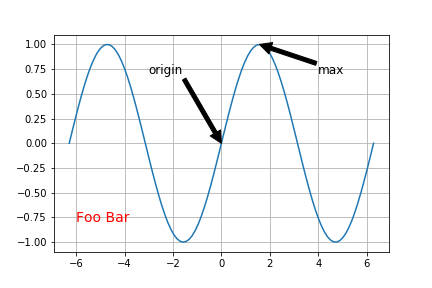

In [34]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
plt.plot(x,np.sin(x),label='sin(x)')

plt.grid()

plt.annotate(s='origin', 
            xy=(0,0), 
            xytext=(-3,.7), 
            fontsize=12,
            arrowprops=dict(facecolor='black'));

plt.annotate(s='max', 
            xy=(np.pi/2,1), 
            xytext=(4,.7), 
            fontsize=12,
            arrowprops=dict(facecolor='black'));

plt.text(x=-6, y=-.8, s='Foo Bar', color='r', fontsize=14)

# Resources

* Transformations tutorial https://matplotlib.org/users/transforms_tutorial.html
